# Click the '▶︎ Run' button on top ⬆️ until a big button appears with 'Store Settings and run the pipeline.'

In [216]:
#Purpose: pre-processing for the pipeline used in the tracking of puncta
#established with Victoria Yan
#
#Grill Lab
#
#2021 January 
#author: Jan Geisler
#################

from IPython.display import HTML
import numpy as np
from ipyfilechooser import FileChooser
import os
import glob
import ipywidgets as widgets

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [13]:
settings=np.loadtxt("PipelineSettings.csv", delimiter=",", unpack=False)
dataSettingsFile = open("PipelineDataSettings.txt")
fileContent = dataSettingsFile.read()
settingsData = fileContent.splitlines()
dataPathWidget=FileChooser(
    settingsData[0],
    title='<b>Data folder</b>',
    show_hidden=False,
    select_default=True,
    use_dir_icons=True,
    show_only_dirs=True
)
ilastikPathWidget=FileChooser(
    settingsData[2],
    filename=settingsData[3],
    title='<b>Ilastik app</b>',
    show_hidden=True,
    select_default=True,
    use_dir_icons=True,
    show_only_dirs=False
)
fijiPathWidget=FileChooser(
    settingsData[4],
    filename=settingsData[5],
    title='<b>Fiji app</b>',
    show_hidden=False,
    select_default=True,
    use_dir_icons=True,
    show_only_dirs=False
)
trackMateScriptWidget=FileChooser(
    settingsData[6],
    filename=settingsData[7],
    title='<b>Trackmate script</b>',
    show_hidden=False,
    select_default=True,
    use_dir_icons=True,
    show_only_dirs=False
)
ilastikProjectWidget=FileChooser(
    settingsData[8],
    filename=settingsData[9],
    title='<b>Ilastik project</b>',
    show_hidden=False,
    select_default=True,
    use_dir_icons=True,
    show_only_dirs=False
)
pathWidgets = widgets.HBox([fijiPathWidget, ilastikPathWidget])
dataChooserWidgets = widgets.HBox([dataPathWidget])

scriptWidgets = widgets.HBox([ilastikProjectWidget, trackMateScriptWidget])


radiusWidget = widgets.FloatSlider(
    value=7.5,
    min=0,
    max=10.0,
    step=0.1,
    description='Radius:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
thresholdWidget = widgets.FloatSlider(
    value=0.1,
    min=0,
    max=100.0,
    step=0.01,
    description='Threshold:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)
frameGapWidget = widgets.IntSlider(
    value=2,
    min=0,
    max=10,
    step=1,
    description='Max Frame Gap:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
)
radiusTextWidget = widgets.FloatText(description='Radius:')
thresholdTextWidget = widgets.FloatText(description='Threshold:')
frameGapTextWidget = widgets.FloatText(description='Max Frame Gap:')

linkingWidget = widgets.IntSlider(
    value=1,
    min=0,
    max=10,
    step=1,
    description='Linking Max:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
closingWidget = widgets.IntSlider(
    value=1,
    min=0,
    max=10.0,
    step=1,
    description='Closing Max:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
useTrackMate=widgets.ToggleButtons(
    options=[True, False],
    description='Tracking:\n',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['If you want to run trackmate with this pipeline press True', 'If you do not want to run it,press False'],
#     icons=['check'] * 3
)
useIlastik=widgets.ToggleButtons(
    options=[True, False],
    description='Ilastik:\n',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['If you want to run ilastik Segmentation with this pipeline press True', 'If you do not want to run it,press False'],
#     icons=['check'] * 3
)


linkingTextWidget = widgets.FloatText(description='Linking Max:')
closingTextWidget = widgets.FloatText(description='Closing Max:')
l = widgets.FloatText(description=':')


ui = widgets.HBox([radiusWidget, thresholdWidget, frameGapWidget])
uj = widgets.HBox([radiusTextWidget , thresholdTextWidget, frameGapTextWidget])
uk = widgets.HBox([linkingWidget, closingWidget, useTrackMate])
ul = widgets.HBox([linkingTextWidget, closingTextWidget,useIlastik ])

def gfunc(a, b, c):
    return True
    #print('')#(a, b, c))
def vals(d,e,f):
    return True
    #print('')#(d,e,f))
def g2(g,h,i):
    return True
def vals2(j,k,l):
    return True

out = widgets.interactive_output(gfunc, {'a': radiusWidget, 'b': thresholdWidget, 'c': frameGapWidget})
outj = widgets.interactive_output(vals, {'d': radiusTextWidget, 'e': thresholdTextWidget, 'f': frameGapWidget})
outk = widgets.interactive_output(g2, {'g': linkingWidget, 'h': closingWidget, 'i': useTrackMate})
outl = widgets.interactive_output(vals2, {'j': linkingTextWidget, 'k': closingTextWidget, 'l': useIlastik})


radiuslink = widgets.jslink((radiusWidget, 'value'), (radiusTextWidget, 'value'))
belink = widgets.jslink((thresholdWidget, 'value'), (thresholdTextWidget, 'value'))
dflink = widgets.jslink((frameGapWidget, 'value'), (frameGapTextWidget, 'value'))
gjlink = widgets.jslink((linkingWidget, 'value'), (linkingTextWidget, 'value'))
hklink = widgets.jslink((closingWidget, 'value'), (closingTextWidget, 'value'))


widgetList=[radiusWidget, thresholdWidget, frameGapWidget,
            radiusTextWidget , thresholdTextWidget, frameGapTextWidget,
            linkingWidget, closingWidget, useTrackMate, useIlastik,
            linkingTextWidget, closingTextWidget]

for widgetIdx in range(len(widgetList)):
    widget=widgetList[widgetIdx]
    widget.value=settings[widgetIdx]






print('If you have selected a file, the path to that file turns orange if it exists. The data folder will stay green.\n')

display(pathWidgets)
display(scriptWidgets)
display(dataChooserWidgets)

print('\n'*5)

print('These are your TrackMate settings:\n'+'Note that its radius and not diameter as in Fiji.\n')
print('You can either write your input values or use the sliders to set them.')

display(ui, out)
display(uj,outj)

display(uk, outk)
display(ul,outl)
print('\n'*5)
 

If you have selected a file, the path to that file turns orange if it exists. The data folder will stay green.









These are your TrackMate settings:
Note that its radius and not diameter as in Fiji.

You can either write your input values or use the sliders to set them.


Output()

Output()

Output()

Output()

In [14]:
import ntpath

def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail or ntpath.basename(head)

dataAbsolutePath=os.path.join(dataPathWidget.selected_path,dataPathWidget.selected_filename)
files=glob.glob(dataAbsolutePath+"/*.tif")
fileSelec=[path_leaf(file)[:-4] for file in files]
ppSelectionWidget = widgets.SelectMultiple(
    options=fileSelec,
    value=fileSelec,
    layout=widgets.Layout(width='100%', height=str(len(files)*30)+'px'),
    description='Plot',
    disabled=False
)
print('For which files do you want to run the pipeline? Default is all. Shift+click to select multiple files.')
display(ppSelectionWidget)

For which files do you want to run the pipeline? Default is all. Shift+click to select multiple files.


SelectMultiple(description='Plot', index=(0, 1, 2), layout=Layout(height='90px', width='100%'), options=('2019…

In [4]:
from IPython.display import Javascript, display

def run_all(ev):
    display(Javascript('IPython.notebook.execute_cells_below()'))
    print('You have saved your settings.')
    
pathwidgets=[dataPathWidget,ilastikPathWidget,fijiPathWidget,trackMateScriptWidget,ilastikProjectWidget]
settings=[widget.value for widget in widgetList]  

settingsData=[]
for pathwidget in pathwidgets:
    settingsData.append(os.path.abspath(pathwidget.selected_path))#+pathwidget.selected_path)))
    settingsData.append(pathwidget.selected_filename)


buttonRunPipe = widgets.Button(description="Store settings and run the pipeline.",layout=widgets.Layout(width='100%', height='80px'))
buttonRunPipe.on_click(run_all)
display(buttonRunPipe)


Button(description='Store settings and run the pipeline.', layout=Layout(height='80px', width='100%'), style=B…

In [5]:
np.savetxt("PipelineSettings.csv", settings,fmt='%.3f', delimiter=",")
with open('PipelineDataSettings.txt', 'w') as f:
    for dataPath in settingsData:
        f.write("%s\n" % dataPath)


In [20]:
radius=radiusWidget.value
threshold=thresholdWidget.value
frameGap=frameGapWidget.value
linkingMax=float(linkingWidget.value)
closingMax=float(closingWidget.value)
macroAbsolutePath=os.path.join(trackMateScriptWidget.selected_path,trackMateScriptWidget.selected_filename)
fijiAbsolutePath=os.path.join(fijiPathWidget.selected_path,fijiPathWidget.selected_filename)
projectAbsolutePath=os.path.join(ilastikProjectWidget.selected_path,ilastikProjectWidget.selected_filename)
ilastikAbsolutePath=os.path.join(ilastikPathWidget.selected_path,ilastikPathWidget.selected_filename)
dataAbsolutePath=os.path.join(dataPathWidget.selected_path,dataPathWidget.selected_filename)

In [21]:
%matplotlib notebook

import numpy as np
from numpy import inf
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
from PIL import Image
from tifffile import imwrite
from skimage import data, util
from skimage.measure import label, regionprops
from scipy.ndimage.interpolation import shift
from skimage.measure import regionprops, label# regionprops_table,  label
from scipy.spatial import KDTree

import pandas as pd
#from numba import jit

from skimage import io
from skimage.filters import sobel
from skimage.measure import label   
from skimage.future import graph
import pims
from skimage.measure import regionprops,label# regionprops_table,  label




from PIL import Image
import os
import platform
import subprocess
import ntpath


In [22]:
import ipywidgets as widgets

import logging

class OutputWidgetHandler(logging.Handler):
    """ Custom logging handler sending logs to an output widget """

    def __init__(self, *args, **kwargs):
        super(OutputWidgetHandler, self).__init__(*args, **kwargs)
        layout = {
            'width': '100%',
            'height': '160px',
            'border': '1px solid black'
        }
        self.out = widgets.Output(layout=layout)

    def emit(self, record):
        """ Overload of logging.Handler method """
        formatted_record = self.format(record)
        new_output = {
            'name': 'stdout',
            'output_type': 'stream',
            'text': formatted_record+'\n'
        }
        self.out.outputs = (new_output, ) + self.out.outputs

    def show_logs(self):
        """ Show the logs """
        display(self.out)

    def clear_logs(self):
        """ Clear the current logs """
        self.out.clear_output()


logger = logging.getLogger(__name__)
handler = OutputWidgetHandler()
handler.setFormatter(logging.Formatter('%(asctime)s  - [%(levelname)s] %(message)s'))
logger.addHandler(handler)
logger.setLevel(logging.INFO)
def createRegionProps(c1mask,c2mask,stack):
    areaC1=[]
    xC1=[]
    yC1=[]
    meanC1=[]
    meanC2=[]
    totClustIntC1=[]
    totClustIntC2=[]
    t=[]

    for i in range(c1Mask.shape[0]):
        img1      = c1Mask[i]
        img2      = c2Mask[i]
        label_img = label(stack[i], connectivity=2)
        props1    = regionprops(label_img,img1)#, extra_properties=(pixelcount,))
        props2    = regionprops(label_img,img2)
        propcount=len(props1)
        for j in range(propcount):
            areaC1.append(        props1[j].area)
            xC1.append(    props1[j].centroid[0])
            yC1.append(    props1[j].centroid[1])
            meanC1.append(        props1[j].mean_intensity)
            meanC2.append(        props2[j].mean_intensity)
            totClustIntC1.append( np.sum(props1[j].intensity_image))
            totClustIntC2.append( np.sum(props2[j].intensity_image))
            t.append(             i)# for keeping track of the frame
    propList=[areaC1,xC1,yC1,t,meanC1,meanC2,totClustIntC1,totClustIntC2]
    spotnum=len(meanC2)
    valuecount=len(propList)
    tryProps=np.zeros((valuecount,spotnum))
    
    for i in range(len(propList)):
        tryProps[i]=np.array(propList[i])

    return tryProps



def matchRegProps(spotarr,regP,t,x,y,I1,I2,spotX,spotY,spotTime,spotI1,spotI2,area,spotArea):
    
    for tslice in np.unique(spotarr[:,spotTime]):
        regPT=regP[regP[:,t]==tslice]
        spotT=spotarr[spotarr[:,spotTime]==tslice]
        
        if regPT[:,x:y+1].shape[0] != 0:
            kdtree = KDTree(np.array(regPT[:,x:y+1]))
            for point in range(spotT.shape[0]):
                searchpoint=np.array([spotT[point,spotY],spotT[point,spotX]])
                d,idx=kdtree.query(searchpoint)
                spotT[point,spotI1]=regPT[idx,I1]
                spotT[point,spotI2]=regPT[idx,I2]
                spotT[point,spotArea]=regPT[idx,area]
        regP[regP[:,t]==tslice]=regPT
        spotarr[spotarr[:,spotTime]==tslice]=spotT    
        
    return spotarr

def calcTimeRateChange(spots,ID,I1,I2,I1m1,I1p1,I2m1,I2p1,J1,J2,spotColNames):
    spotarr=np.array(spots)
    for trackID in np.unique(spots["trackID"]):
        condition=(spotarr[:,ID]==trackID)

        spotarr[condition,I1m1]=shift(spotarr[condition,I1],1,cval=np.nan)
        spotarr[condition,I2m1]=shift(spotarr[condition,I2],1,cval=np.nan)

        spotarr[condition,I1p1]=shift(spotarr[condition,I1],-1,cval=np.nan)
        spotarr[condition,I2p1]=shift(spotarr[condition,I2],-1,cval=np.nan)

        spotarr[condition,J1]=spotarr[condition,I1p1]-spotarr[condition,I1m1]
        spotarr[condition,J2]=spotarr[condition,I2p1]-spotarr[condition,I2m1] 
    return pd.DataFrame(spotarr,columns=spotColNames)

def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail or ntpath.basename(head)

def imgu16(img):
    img[img<=0]=0
    img-=np.min(img)
    img=img/np.max(img)*np.iinfo("uint16").max
    return img.astype(np.uint16)

def tifSave(tiff,path):
    io.imsave(path, imgu16(tiff),plugin='tifffile')

def tifSaveRaw(tiff,path):
    io.imsave(path, tiff,plugin='tifffile') 
    
def filesToStr(files):
    printable=""
    for file in files:
        printable+=file+" "
    return printable 

def filesInDir(directory,fileExt):
    files=[os.path.join(directory, _) for _ in os.listdir(directory) if _.endswith(fileExt)]#[_ for _ in os.listdir(fileDir) if _.endswith(fileExt)]
    printable=""
    for file in files:
        printable+=file+" "
    return printable


#img should be 2 channel ctxy stack
def splitChannels(img):
    return img[:,0,:,:], img[:,1,:,:]
   
#chooses upper right corner in the image, and takes the mean over all slices    
def subtractBackground(img):
    bgrd=np.mean(np.mean(img[:,0:50,0:50],axis=2),axis=1)
    bgrd=bgrd[...,np.newaxis,np.newaxis]
    return img[:,:,:]-bgrd[:]
    
    
#bleachcorrect is a literal translation of the simple ratio method in ImageJ    
def bleachCorrect(img):
    num=np.mean(np.mean(img,axis=1),axis=1)[0]
    denom=np.mean(np.mean(img,axis=1),axis=1)
    denom=denom[...,np.newaxis,np.newaxis]
    return img*num/denom
    
#other parameters can be changed if necessary in the script; 
#can be integrated by adding another line of code, that adds the additional variable to the function call
def runTrackMate(fileDir,outDir,radius,threshold,frameGap,linkingMax,closingMax, macroAbsolutePath, fijiAbsolutePath):
    fijiCommand=fijiAbsolutePath+" --ij2 --headless --console --run "+macroAbsolutePath
    fijiCommand+=" \'"
    fijiCommand+="inDir="+"\""+os.path.abspath(fileDir)+"\""
    fijiCommand+=", "+"outDir="+"\""+os.path.abspath(outDir)+"\""
    fijiCommand+=", "+"radius="+"\""+str(radius)+"\""
    fijiCommand+=", "+"threshold="+"\""+str(threshold)+"\""
    fijiCommand+=", "+"frameGap="+"\""+str(frameGap)+"\""
    fijiCommand+=", "+"linkingMax="+"\""+str(linkingMax)+"\""
    fijiCommand+=", "+"closingMax="+"\""+str(closingMax)+"\""
    fijiCommand+="\'"
    subprocess.run([fijiCommand],shell=True)

    
#datasets should be comparable, not largely different -> otherwise ilastik might fail to segment properly.
def runPixelClass(file_dir, projectAbsolutePath, ilastikAbsolutePath):
    paths_prnt=filesInDir(file_dir+preprocessedFolder,".tif")
    ilastikCommand=""
    ilastikCommand=ilastikAbsolutePath+" "
    ilastikCommand+="--headless --project="+projectAbsolutePath+" "
    ilastikCommand+="--output_format=\"tif sequence\""+" "
    ilastikCommand+="--export_source=\"Simple Segmentation\""+" "
    ilastikCommand+="--output_filename_format="+file_dir+"/"+"masks/"+"{nickname}/"+"{nickname}_seg_{slice_index}.tif"+" "
    ilastikCommand+=paths_prnt
    subprocess.run([ilastikCommand],shell=True)
    
def plotPP(X,Y,xmean,ymean,condition,Jx,Jy,figPath,scale=12,headwidth=4,width=0.01):
    fig,ax =plt.subplots(figsize=(10,6))
    ax.quiver(X[condition]/xmean,
               Y[condition]/ymean, Jy[condition]/(magnitude[condition]),
               Jx[condition]/(magnitude[condition]), [magnitude[condition]],
               units='xy', angles='xy', scale_units='xy', scale=scale, headwidth=headwidth,
               pivot='middle', width=width)
    im=ax.quiver(X[condition]/xmean,
               Y[condition]/ymean, Jy[condition]/(magnitude[condition]),
               Jx[condition]/(magnitude[condition]), [magnitude[condition]],
               units='xy', angles='xy', scale_units='xy', scale=scale, headwidth=headwidth,
               pivot='middle', width=width)
    cbar=fig.colorbar(im,extend='max', ax=ax)#label='Time Rate Change',)
    cbar.ax.tick_params(labelsize=12) 
    #cbar.clim(0.05, 0.55)
    plt.xlabel('LifeAct Intensity (A.U.)',fontsize=16)
    plt.ylabel('WSP-1 Intensity (A.U.)',fontsize=16)
    ax.tick_params(labelsize=16)
    plt.tight_layout()
    plt.savefig(figPath)
    
   

In [23]:

def plotConcentrationPP(X,Y,xmean,ymean,condition,Jx,Jy,figPath,scale=12,headwidth=4,width=0.01):
    fig,ax =plt.subplots(figsize=(10,6))
    ax.quiver(X[condition],
               Y[condition], Jy[condition],
               Jx[condition], [magnitude[condition]],
               units='xy', angles='xy', scale_units='xy', scale=scale, headwidth=headwidth,
               pivot='middle', width=width)
    im=ax.quiver(X[condition],
               Y[condition], Jy[condition],
               Jx[condition], [magnitude[condition]],
               units='xy', angles='xy', scale_units='xy', scale=scale, headwidth=headwidth,
               pivot='middle', width=width)
    cbar=fig.colorbar(im,extend='max', ax=ax)#label='Time Rate Change',)
    cbar.ax.tick_params(labelsize=12) 
    #cbar.clim(0.05, 0.55)
    plt.xlabel('Volume',fontsize=16)
    plt.ylabel('Stochiometry',fontsize=16)
    ax.tick_params(labelsize=16)
    plt.tight_layout()
    plt.savefig(figPath) 
    
    
def calcConcentrationTimeRateChange(spots,ID,I1,I2,I1m1,I1p1,I2m1,I2p1,J1,J2,spotColNames):
    spotarr=np.array(spots)
    for trackID in np.unique(spots["trackID"]):
        condition=(spotarr[:,ID]==trackID)

        spotarr[condition,I1m1]=shift(spotarr[condition,I1],1,cval=np.nan)
        spotarr[condition,I2m1]=shift(spotarr[condition,I2],1,cval=np.nan)

        spotarr[condition,I1p1]=shift(spotarr[condition,I1],-1,cval=np.nan)
        spotarr[condition,I2p1]=shift(spotarr[condition,I2],-1,cval=np.nan)

        spotarr[condition,J1]=spotarr[condition,I1p1]-spotarr[condition,I1m1]
        spotarr[condition,J2]=spotarr[condition,I2p1]-spotarr[condition,I2m1] 
    return pd.DataFrame(spotarr,columns=spotColNames)

def concentrationSpotConversion(spots,ID,area,volume,I1,I2,I1m1,I1p1,I2m1,I2p1,J1,J2,spotColNames):
    #spots["volume"]=volume(spots["area"])
    spotarr=np.array(spots)
    spotarr[:,volume]=volumeFromArea(spotarr[:,area])
    spotarr[:,I1]=spotarr[:,I1]/spotarr[:,volume]
    spotarr[:,I2]=spotarr[:,I2]/spotarr[:,volume]
    
    for trackID in np.unique(spots["trackID"]):
        condition=(spotarr[:,ID]==trackID)

        spotarr[condition,I1m1]=shift(spotarr[condition,I1],1,cval=np.nan)
        spotarr[condition,I2m1]=shift(spotarr[condition,I2],1,cval=np.nan)

        spotarr[condition,I1p1]=shift(spotarr[condition,I1],-1,cval=np.nan)
        spotarr[condition,I2p1]=shift(spotarr[condition,I2],-1,cval=np.nan)

        spotarr[condition,J1]=spotarr[condition,I1p1]-spotarr[condition,I1m1]
        spotarr[condition,J2]=spotarr[condition,I2p1]-spotarr[condition,I2m1] 
    return pd.DataFrame(spotarr,columns=spotColNames)

def volumeFromArea(area):
    return np.sqrt(area/np.pi)**3 * np.pi*4/3
    

In [24]:

handler.show_logs()

Output(layout=Layout(border='1px solid black', height='160px', width='100%'))

In [25]:
handler.clear_logs()
logger.info('Starting pipeline')
logger.info('Preprocessing...')


In [26]:
macroAbsolutePath=os.path.abspath(macroAbsolutePath)
fijiAbsolutePath=os.path.abspath(fijiAbsolutePath)
projectAbsolutePath=os.path.abspath(projectAbsolutePath)
ilastikAbsolutePath=os.path.abspath(ilastikAbsolutePath)
dataAbsolutePath=os.path.abspath(dataAbsolutePath)
#files=glob.glob(dataAbsolutePath+"/*.tif")
files=[os.path.join(dataAbsolutePath,file+".tif") for file in ppSelectionWidget.value]
filenames=[os.path.join(file+".tif") for file in ppSelectionWidget.value]#[path_leaf(file) for file in files]
directories=glob.glob(dataAbsolutePath+"/*/")


roiFolder="/roi/"
preprocessedFolder="/preprocessed/"
channelsFolder="/channels/"
sumFolder="/sum/"
masksFolder="/masks/"
maskStacksFolder="/maskStacks/"
mergeStacksFolder="/merged/"
trackMateFolder="/trackingStacks/"
resultsFolder="/results/"
tag="bgrd_bc"

pathCreateList=[roiFolder,preprocessedFolder,channelsFolder,
    sumFolder,masksFolder,maskStacksFolder,maskStacksFolder+sumFolder,maskStacksFolder+channelsFolder,maskStacksFolder+mergeStacksFolder,trackMateFolder,resultsFolder]
for path in pathCreateList:
    try:
        #print(os.path.abspath(dataAbsolutePath+path))
        os.mkdir(dataAbsolutePath+path)
    except:
        pass

In [20]:

for file in range(len(files)):
    ############################################
    #Preprocessing, Background subtraction######
    #Channel splitting if data is present ######
    #in multiple channels. SAVE AS uint16  #####
    ############################################
    
    try:
        os.mkdir(dataAbsolutePath+channelsFolder+"/"+filenames[file][:-4]+"/") 
    except:
        pass
    
    im=io.imread(files[file])
    im1,im2 =splitChannels(im)
    im1=bleachCorrect(subtractBackground(im1))
    im2=bleachCorrect(subtractBackground(im2))
    #plt.figure()
    #plt.plot(np.linspace(0,1,im1.shape[0]),np.mean(np.mean(im1,axis=1),axis=1))
    #ImSum=np.sum(im[:,0,:,:]+im[:,1,:,:],axis=0)
    #imgROI(ImSum,dataAbsolutePath,filenames[file][:-4])
    
    c1Path=os.path.abspath(dataAbsolutePath+channelsFolder+"/"+filenames[file][:-4]+"/"+filenames[file][:-4]+tag+"_c1"+".tif")
    c2Path=os.path.abspath(dataAbsolutePath+channelsFolder+"/"+filenames[file][:-4]+"/"+filenames[file][:-4]+tag+"_c2"+".tif")

    
    tifSave(im1+im2,dataAbsolutePath+preprocessedFolder+filenames[file][:-4]+tag+".tif")
    tifSave(im1,c1Path)
    tifSave(im2,c2Path)

In [21]:
############################################
#Calls a script in ilastik. Example here: ##
#Pixel Classification, with pretrained #####
#project. Data with which it was trained ###
#should be included in the folder.       ###
#Alternatively, open the trianing data #####
#FROM the folder in which the pipe runs. ###
############################################
if useIlastik.value:
    logger.info('Running PixelClassification...')
    runPixelClass(dataAbsolutePath, projectAbsolutePath, ilastikAbsolutePath)

In [27]:
############################################
#Get filepaths of preprocessed data ########
#Channels are multiplied with the mask, ####
#for calculating the intensities. ##########
#Used later for running the tracking.#######
############################################

sequenceDirectories=glob.glob(dataAbsolutePath+masksFolder+"/*/")

channelsDirectories=glob.glob(dataAbsolutePath+channelsFolder+"/*/")
proc_filenames=[path_leaf(file) for file in sequenceDirectories]
filenames=[proc_filenames[i][:-7]+".tif" for i in range(len(proc_filenames))]
channels_filenames=[path_leaf(file) for file in channelsDirectories]

In [24]:
logger.info('Preparing the masks for tracking...')
for file in range(len(filenames)):
    ############################################
    #Channels are multiplied with the mask, ####
    #for calculating the intensities. ##########
    #Used later for running the tracking.#######
    #Mask stored as binary mask as req. by fiji#
    ############################################
    c1Path=os.path.abspath(dataAbsolutePath+channelsFolder+"/"+filenames[file][:-4]+"/"+filenames[file][:-4]+tag+"_c1"+".tif")
    c2Path=os.path.abspath(dataAbsolutePath+channelsFolder+"/"+filenames[file][:-4]+"/"+filenames[file][:-4]+tag+"_c2"+".tif")
    c1MaskPath=os.path.abspath(dataAbsolutePath+maskStacksFolder+channelsFolder+filenames[file][:-4]+tag+"_c1"+".tif")
    c2MaskPath=os.path.abspath(dataAbsolutePath+maskStacksFolder+channelsFolder+filenames[file][:-4]+tag+"_c2"+".tif")
    #mergeMaskPath=os.path.abspath(dataAbsolutePath+trackMateFolder+filenames[file][:-4]+"MC"+".tif")
    
    stack =pims.ImageSequence(dataAbsolutePath+masksFolder+filenames[file][:-4]+tag+"/*.tif")
    stack=np.array(stack)
    stack-=1
    #Here one could separate the different labels, when supplied by the mask done in ilastik
    c1=io.imread(c1Path)
    c2=io.imread(c2Path)
    c1Mask=stack*c1
    c2Mask=stack*c2
    stack=(stack)*255 #TrackMate expects [0,255] array as binary mask for tracking
    tifSaveRaw(c1Mask,c1MaskPath)
    tifSaveRaw(c2Mask,c2MaskPath)
    tifSaveRaw(stack,dataAbsolutePath+maskStacksFolder+sumFolder+proc_filenames[file]+"mask"+".tif")

/Users/jgeisler/opt/anaconda3/envs/pipe/lib/python3.7/site-packages/ipykernel_launcher.py:127: UserWarning: /Users/jgeisler/Documents/Master_Thesis/Coding/Book_Chapter/maskStacks/channels/201126_swg198_compositebgrd_bc_c1.tif is a low contrast image
/Users/jgeisler/opt/anaconda3/envs/pipe/lib/python3.7/site-packages/ipykernel_launcher.py:127: UserWarning: /Users/jgeisler/Documents/Master_Thesis/Coding/Book_Chapter/maskStacks/channels/20190910_swg198_compositebgrd_bc_c1.tif is a low contrast image
/Users/jgeisler/opt/anaconda3/envs/pipe/lib/python3.7/site-packages/ipykernel_launcher.py:127: UserWarning: /Users/jgeisler/Documents/Master_Thesis/Coding/Book_Chapter/maskStacks/channels/20190910_swg198_compositebgrd_bc_c2.tif is a low contrast image
/Users/jgeisler/opt/anaconda3/envs/pipe/lib/python3.7/site-packages/ipykernel_launcher.py:127: UserWarning: /Users/jgeisler/Documents/Master_Thesis/Coding/Book_Chapter/maskStacks//sum/20190910_swg198_compositebgrd_bcmask.tif is a low contrast ima

In [26]:

############################################
#Runs Script in Fiji, which is written #####
#in any imageJ script lang. Runs headless ##
#so GUI/window grab not possible. In the  ##
#example case is trackMate, gives tracks  ##
#and positions of puncta in txt file in  ###a
#the results subfolder. ####################
############################################
if useTrackMate.value:
    logger.info('Tracking...')
    runTrackMate(dataAbsolutePath+maskStacksFolder+sumFolder,dataAbsolutePath+resultsFolder,radius,threshold,frameGap,linkingMax,closingMax, macroAbsolutePath, fijiAbsolutePath)

In [149]:
logger.info('Measuring intensities...')
for file in range(len(proc_filenames)):
    ############################################
    #Channels are multiplied with the mask, ####
    ############################################
    #Matching Regionprops &TrackMate  ##########
    ##
    ############################################
    c1MaskPath = os.path.abspath(dataAbsolutePath+maskStacksFolder+channelsFolder+filenames[file][:-4]+tag+"_c1"+".tif")
    c2MaskPath = os.path.abspath(dataAbsolutePath+maskStacksFolder+channelsFolder+filenames[file][:-4]+tag+"_c2"+".tif")
    stackPath  = os.path.abspath(dataAbsolutePath+maskStacksFolder+sumFolder+filenames[file][:-4]+tag+"mask"+".tif")
    
    
    resPath    = os.path.abspath(dataAbsolutePath+resultsFolder+proc_filenames[file]+"RES"+".txt")
    regPropsPath = os.path.abspath(dataAbsolutePath+resultsFolder+proc_filenames[file]+"_RP"+".txt")
    matchedPath  = os.path.abspath(dataAbsolutePath+resultsFolder+proc_filenames[file]+"_ResRPmatched"+".txt")

    
    stack = io.imread(stackPath)
    c1Mask=io.imread(c1MaskPath).astype(float)
    c2Mask=io.imread(c2MaskPath).astype(float)

    
    
    cRP=createRegionProps(c1Mask,c2Mask,stack)
    colNames=["areaC1","xC1","yC1","t","meanC1","meanC2","I1","I2"]
    regionProps=pd.DataFrame(np.column_stack(cRP),columns=colNames)
    
    regionProps.to_csv(regPropsPath, index = False)
    
    spotColNames=["spotID", "trackID", "frame", "x", "y", "radius", "SNR", "estDiameter","I1" , "I2", "I1m1","I1p1","I2m1","I2p1","J1","J2","area",'volume','volumeRateChange','stochiometry','stochiometryRateChange']
    spots=pd.read_csv(resPath,names=spotColNames)
    
    
    regP=np.array(regionProps)
    spotarr=np.array(spots)
    
    spotarr=matchRegProps(spotarr,regP,t=regionProps.columns.get_loc('t'),
                          x=regionProps.columns.get_loc('xC1'),y=regionProps.columns.get_loc('yC1'),
                          I1=regionProps.columns.get_loc('I1'),I2=regionProps.columns.get_loc('I2'),
                          spotX=spots.columns.get_loc('x'),spotY=spots.columns.get_loc('y'),
                          spotTime=spots.columns.get_loc('frame'),spotI1=spots.columns.get_loc('I1'),
                          spotI2=spots.columns.get_loc('I2'),area=regionProps.columns.get_loc('areaC1'),spotArea=spots.columns.get_loc('area'))
    
    
    
    spots=pd.DataFrame(spotarr,columns=spotColNames)
    spots=spots.sort_values(['trackID','frame'])
    spots.to_csv(matchedPath, index = False)
    
    argsList = ['trackID',"I1" , "I2", "I1m1","I1p1","I2m1","I2p1","J1","J2"]
    args = []
    for arg in argsList:
        args.append(spots.columns.get_loc(arg))
    
    #it's important to call calcTimeRateChange AFTER the spots have been sorted 
    #otherwise the time rate change will not be calculated between subsequent times on the same spot
    spots=calcTimeRateChange(spots,*tuple(args),spotColNames)
    spots.to_csv(matchedPath, index = False)

<IPython.core.display.Javascript object>


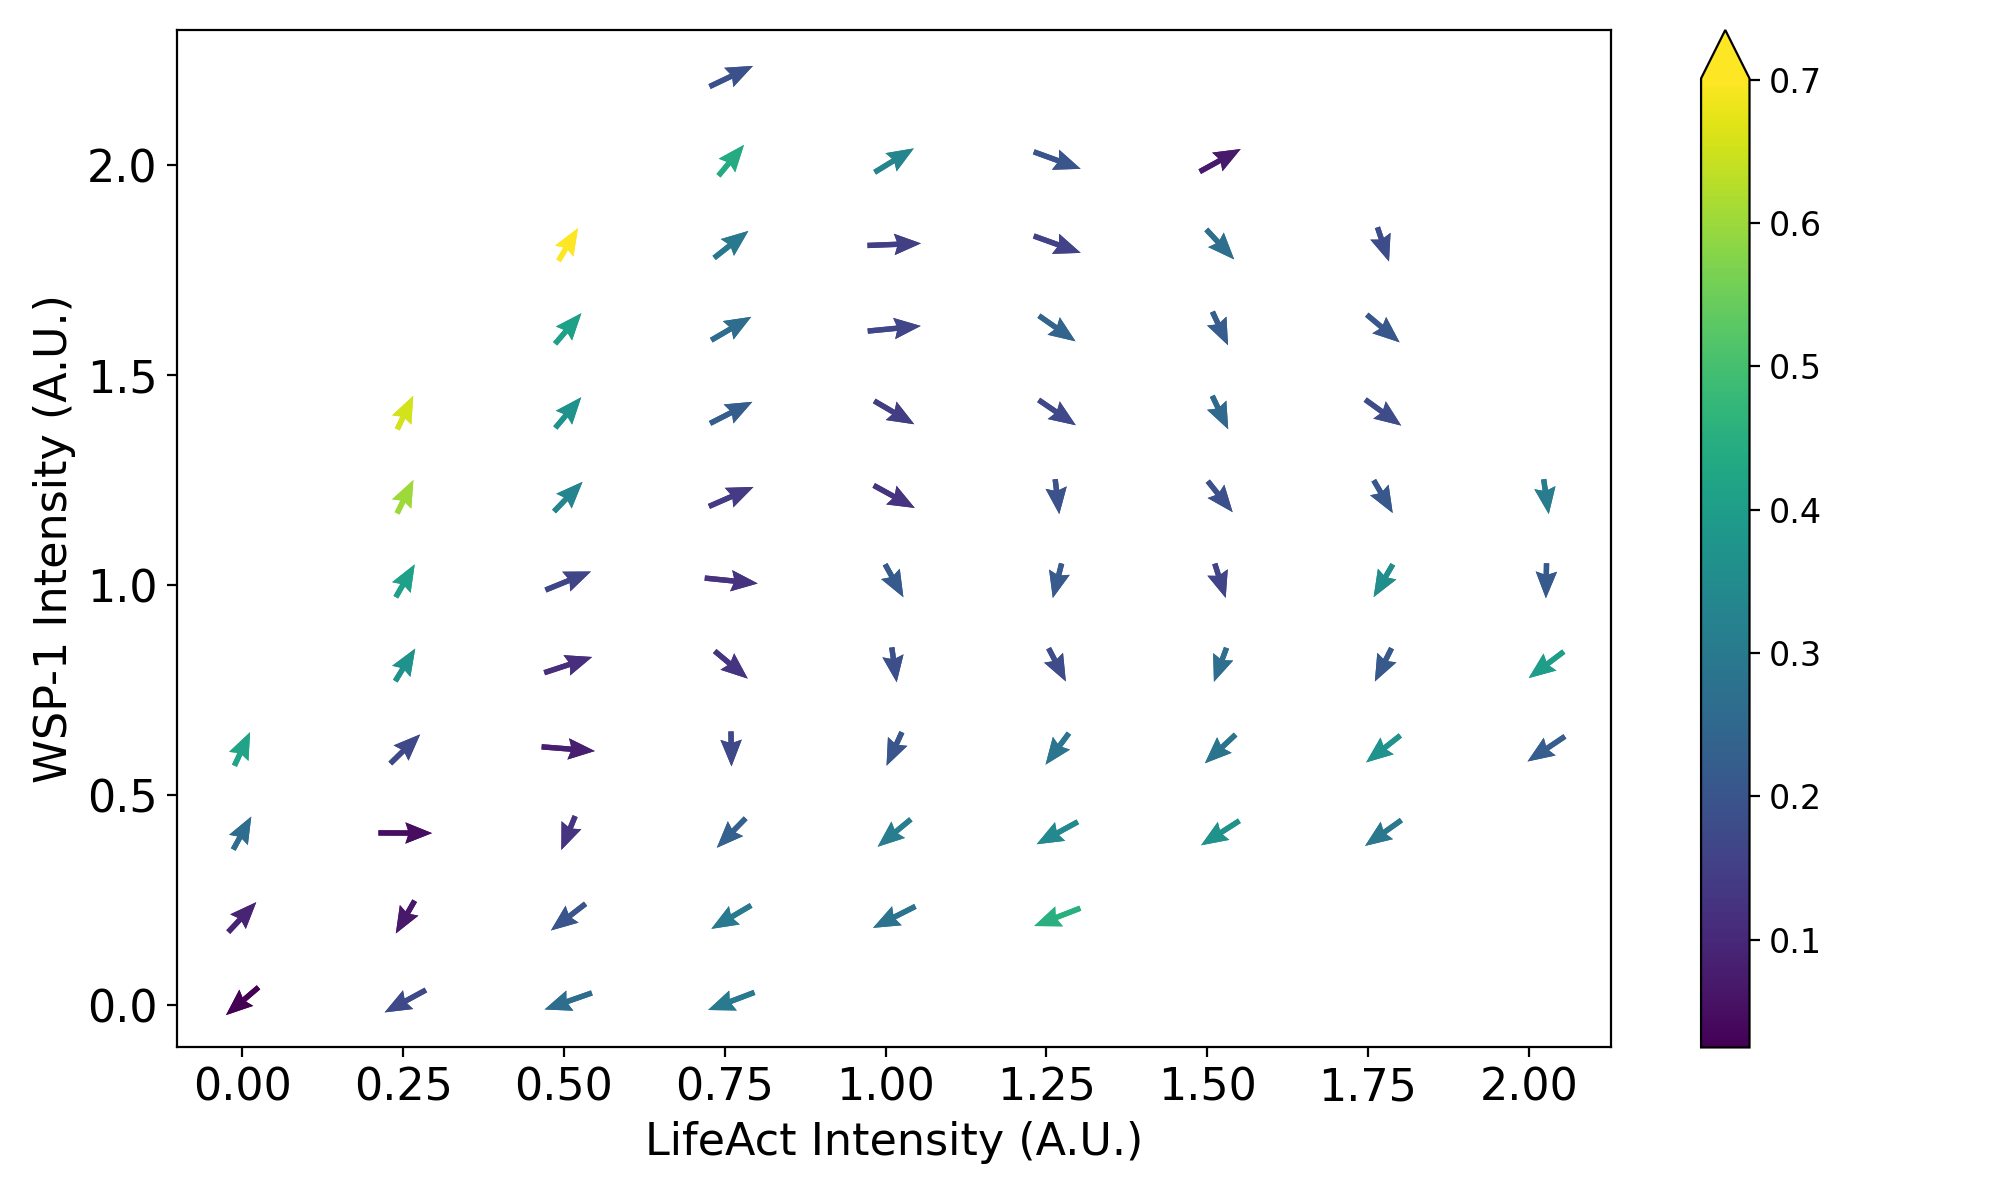

<IPython.core.display.Javascript object>


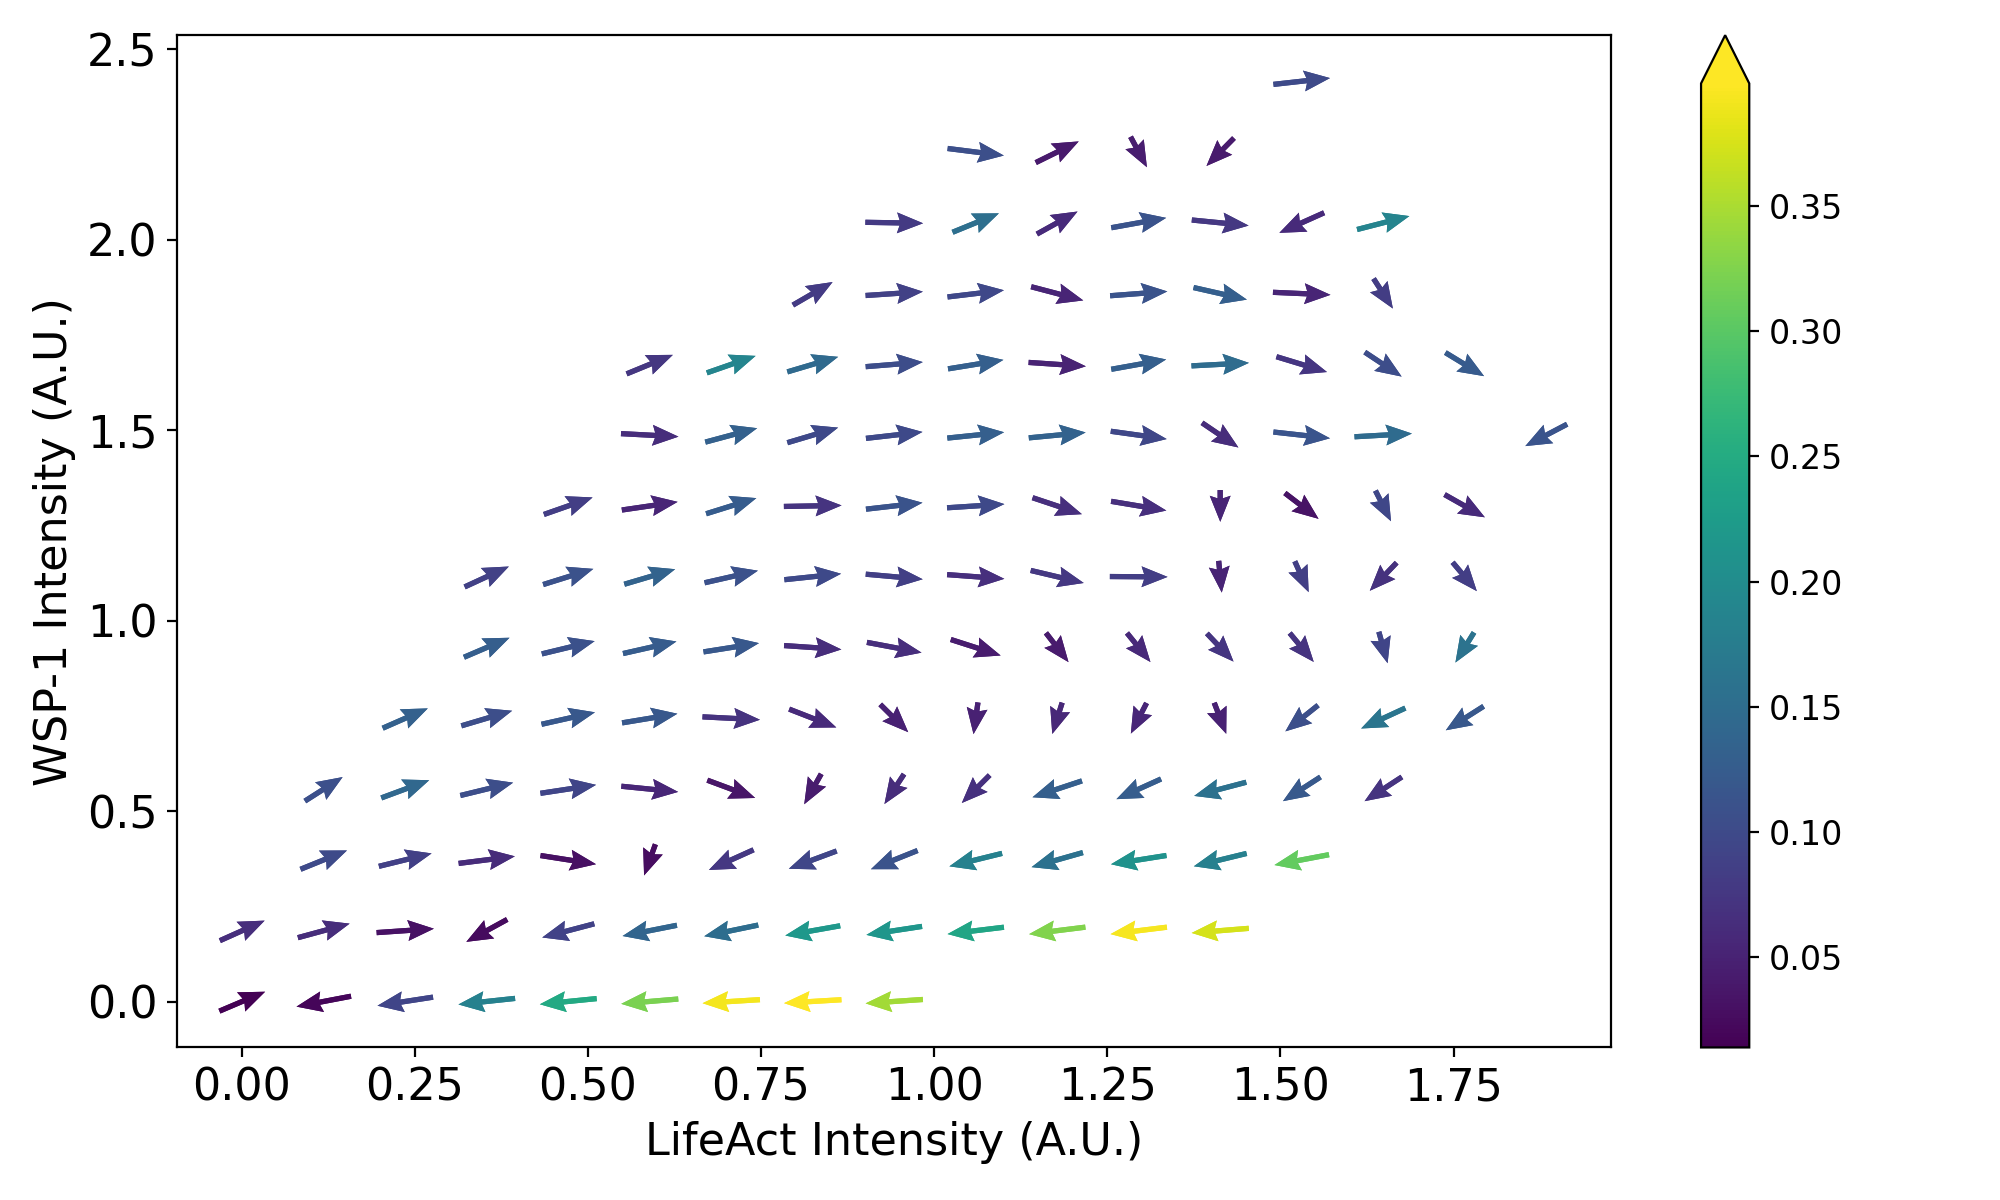

<IPython.core.display.Javascript object>


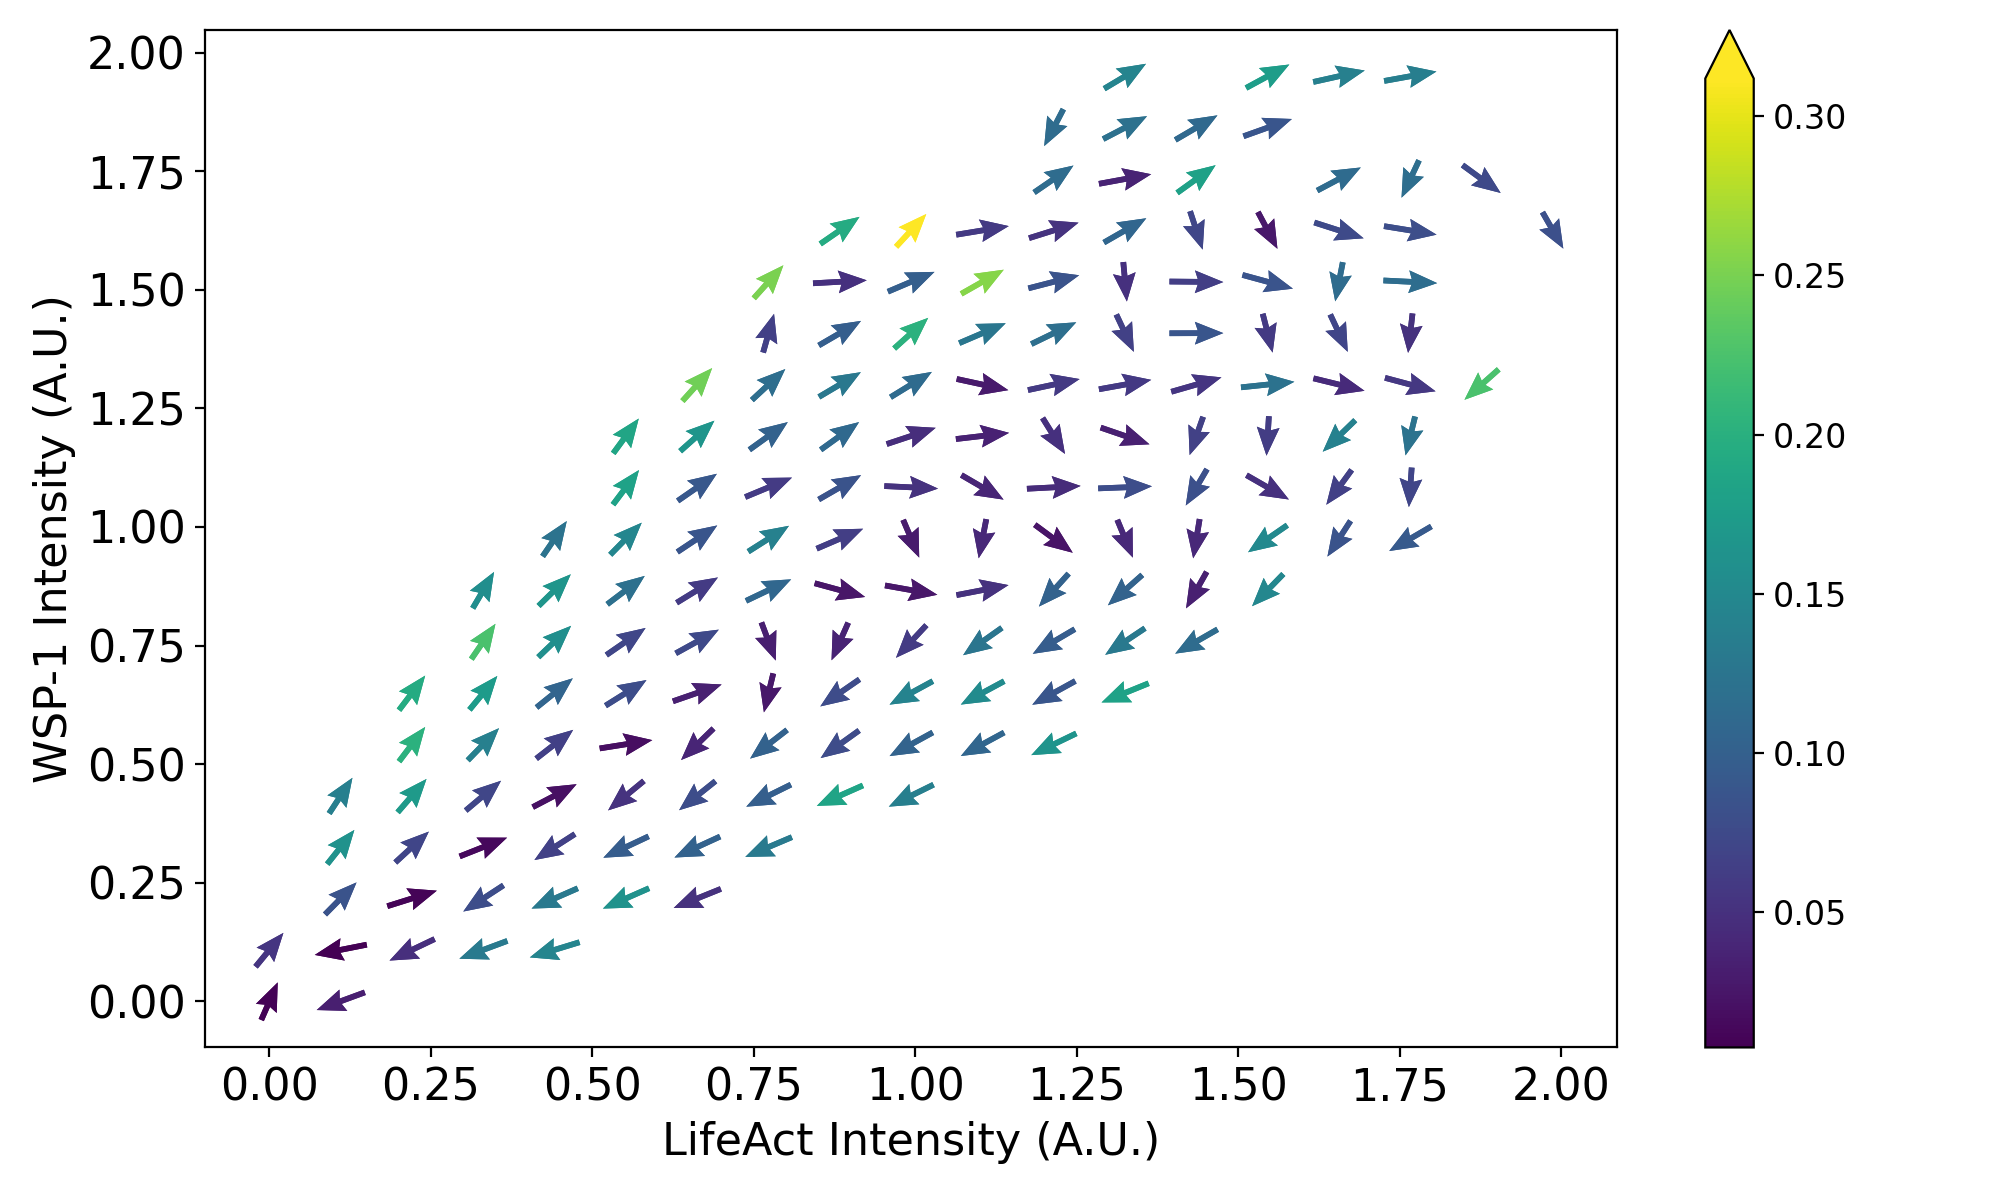

In [33]:
logger.info('Calculating the phase portrait(s)...')

for file in range(len(filenames)):
    if fileSelec[file] in ppSelectionWidget.value:
        matchedPath  = os.path.abspath(dataAbsolutePath+resultsFolder+proc_filenames[file]+"_ResRPmatched"+".txt")
        figPath  = os.path.abspath(dataAbsolutePath+resultsFolder+proc_filenames[file]+".pdf")
        
        spots=pd.read_csv(matchedPath)
        #This is only here for figuring out how to match the spots/area
        spots=spots.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]]
        spots=spots.dropna()
        mincount=50
        numbins=50

        Jx, xedges, yedges =np.histogram2d(spots["I1"], spots["I2"], bins=numbins, weights=spots["J1"]) 
        Jy, xedges, yedges =np.histogram2d(spots["I1"], spots["I2"], bins=numbins, weights=spots["J2"]) 

        count, x, y =np.histogram2d(spots["I1"], spots["I2"], bins=numbins) 
        condition=(count>=mincount)
        Jy[condition]/=count[condition]
        #Jy[count<mincount]=0
        Jx[condition]/=count[condition]
        #Jx[count<mincount]=0

        X,Y=np.meshgrid(xedges[:-1], yedges[:-1])
        Jx/=np.nanmean(X)
        Jy/=np.nanmean(Y)
        X/=np.nanmean(X)
        Y/=np.nanmean(Y)
        xmean=np.mean(X[condition])
        ymean=np.mean(Y[condition])

        Jx[condition]/=xmean
        Jy[condition]/=ymean
        magnitude=np.sqrt(Jx*Jx+Jy*Jy)

        plotPP(X,Y,xmean,ymean,condition,Jx,Jy,figPath,scale=12,headwidth=4,width=0.01)